### Covid-19 Live Data
<img src="qualitrolcorp.png" alt="covid-19_qualitrolcorp" width="500"/>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#for dropdown widget 
from ipywidgets import widgets as wd 
from IPython.display import display

import datetime
import os 

allData = pd.read_excel("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx")

allData.head()

#and John Hopkins data

lastDataDate = datetime.date.strftime(datetime.date.today()- datetime.timedelta(1),"%m-%d-%Y")

enigma = pd.read_csv(os.path.join("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/", lastDataDate + ".csv"))

### Enigma / John Hopkins University data exploration

In [2]:
enigma.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-14 03:33:15,34.223334,-82.461707,63,0,0,63,"Abbeville, South Carolina, US",256.859787,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-14 03:33:15,30.295065,-92.414197,577,31,0,546,"Acadia, Louisiana, US",929.970183,5.372617
2,51001.0,Accomack,Virginia,US,2020-06-14 03:33:15,37.767072,-75.632346,989,14,0,975,"Accomack, Virginia, US",3060.403515,1.415571
3,16001.0,Ada,Idaho,US,2020-06-14 03:33:15,43.452658,-116.241552,877,22,0,855,"Ada, Idaho, US",182.106245,2.508552
4,19001.0,Adair,Iowa,US,2020-06-14 03:33:15,41.330756,-94.471059,11,0,0,11,"Adair, Iowa, US",153.803132,0.000000


In [36]:
enigma.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3736,NaN,NaN,NaN,West Bank and Gaza,2020-06-14 03:33:15,31.952200,35.233200,489,3,415,71,West Bank and Gaza,9.585574,0.613497
3737,NaN,NaN,NaN,Western Sahara,2020-06-14 03:33:15,24.215500,-12.885800,9,1,8,0,Western Sahara,1.506705,11.111111
3738,NaN,NaN,NaN,Yemen,2020-06-14 03:33:15,15.552727,48.516388,705,160,39,506,Yemen,2.363712,22.695035
3739,NaN,NaN,NaN,Zambia,2020-06-14 03:33:15,-13.133897,27.849332,1357,10,1104,243,Zambia,7.381436,0.736920
3740,NaN,NaN,NaN,Zimbabwe,2020-06-14 03:33:15,-19.015438,29.154857,356,4,54,298,Zimbabwe,2.395221,1.123596


In [ ]:
enigma.shape

In [ ]:
enigma.nunique()

In [3]:
enigma.Country_Region.unique()

array(['US', 'Italy', 'Brazil', 'Russia', 'Mexico', 'Japan', 'Canada',
       'Colombia', 'Peru', 'Spain', 'India', 'United Kingdom', 'China',
       'Chile', 'Netherlands', 'Australia', 'Pakistan', 'Germany',
       'Sweden', 'Ukraine', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritre

In [4]:
enigma.Province_State.unique()

array(['South Carolina', 'Louisiana', 'Virginia', 'Idaho', 'Iowa',
       'Kentucky', 'Missouri', 'Oklahoma', 'Colorado', 'Illinois',
       'Indiana', 'Mississippi', 'Nebraska', 'Ohio', 'Pennsylvania',
       'Washington', 'Wisconsin', 'Vermont', 'Minnesota', 'Florida',
       'North Carolina', 'California', 'New York', 'Wyoming', 'Michigan',
       'Maryland', 'Kansas', 'Alaska', 'Tennessee', 'Texas', 'Maine',
       'Arizona', 'Georgia', 'Arkansas', 'New Jersey', 'South Dakota',
       'Alabama', 'Oregon', 'West Virginia', 'North Dakota',
       'Massachusetts', 'Utah', 'Montana', 'New Hampshire', 'New Mexico',
       'Rhode Island', 'Nevada', 'District of Columbia', 'Connecticut',
       'Hawaii', 'Delaware', 'Abruzzo', 'Acre', 'Adygea Republic',
       'Aguascalientes', 'Aichi', 'Akita', 'Alagoas', 'Alberta',
       'Altai Krai', 'Altai Republic', 'Amapa', 'Amazonas', 'Amur Oblast',
       'Ancash', 'Andalusia', 'Andaman and Nicobar Islands',
       'Andhra Pradesh', 'Anguilla', '

### Enigma / John Hopkins plot

In [ ]:
#de-one hot encode by adding a single status column for deaths, recovered and active
enigmaReportCols = ["Deaths","Recovered","Active"]

meltedEnigma = enigma.melt(id_vars=enigma.drop(enigmaReportCols, axis=1), value_vars=enigmaReportCols, var_name=['Status'], value_name='Number') # Melting

In [ ]:
meltedEnigma.head()

In [ ]:
meltedEnigma.shape

In [ ]:
#display as a grouped DF by country, sorted in descending order of confirmed cases 
meltedEnigmaSummary = meltedEnigma.groupby(['Country_Region','Status']).sum()
meltedEnigmaSummary.head()
meltedEnigmaSummary.shape
meltedEnigmaSummary=pd.DataFrame(meltedEnigmaSummary.to_records())
meltedEnigmaSummary = meltedEnigmaSummary.sort_values(['Confirmed'],ascending = False)
meltedEnigmaSummary=meltedEnigmaSummary.head(30)

#get top10 countries by confirmed cases
top10=meltedEnigmaSummary.head(30).Country_Region.unique()
top10
top10_enigma = enigma[enigma["Country_Region"].isin(top10)]
top10_enigma_stats=top10_enigma[["Country_Region","Deaths","Recovered","Active","Confirmed"]]
top10_enigma_stats=top10_enigma_stats.groupby("Country_Region").sum()
top10_enigma_stats=top10_enigma_stats.sort_values(['Confirmed'],ascending = False)

In [ ]:
#see also this link for adding datatable below
#https://matplotlib.org/3.1.1/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

A = top10_enigma_stats.Deaths
B = top10_enigma_stats.Recovered
C = top10_enigma_stats.Active

fig = plt.figure(facecolor="white",figsize=(15,8))
plt.title("Confirmed Cases by Country", fontsize=18)

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
bar_l = np.arange(1, 11)
tick_pos = [i-0.5 + bar_width for i in bar_l]

ax1 = ax.bar(bar_l, A, width=bar_width, label="deaths", color="red") #deaths
ax2 = ax.bar(bar_l, B, bottom=A, width=bar_width, label="recovered", color="green") #recovered
ax3 = ax.bar(bar_l, C, bottom=A+B, width=bar_width, label="active", color="orange") #active

ax.set_ylabel("Count (k)", fontsize=14)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#ax.set_xlabel("Country", fontsize=18)
ax.legend(loc="best")
plt.xticks(tick_pos, top10, fontsize=10)
plt.yticks(fontsize=14)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
#     plt.text(r1.get_x() + r1.get_width()-0.25  , 10 , "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
#     plt.text(r2.get_x() + r2.get_width()-0.25  , h1 + h2 / 3., "%d" % h2, ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")
#     plt.text(r3.get_x() + r3.get_width() -0.25 , h1 + h2 + h3 / 3., "%d" % h3, ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")

    plt.text(r1.get_x() + r1.get_width()-0.25  , 100 , f'{h1:,}', ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width()-0.25  , h1 + h2 / 3., f'{h2:,}', ha="center", va="bottom", color="white", fontsize=10,fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() -0.25 , h1 + h2 + h3 / 3., f'{h3:,}', ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")

In [ ]:
fig

In [ ]:
top10_enigma_stats

### Filter by Country

In [ ]:
#alternative

# List of countries

print(allData.countriesAndTerritories.unique())

#alternative

#userCountry = input("\nchoose a country: ")

In [ ]:
userOptions = wd.Dropdown(
        options=allData.countriesAndTerritories.unique(),
        value='Afghanistan',
        description='Countries:',
        disabled=False
        )

display(userOptions)

In [ ]:
userCountry =userOptions.value

filtered_df = allData.loc[allData['countriesAndTerritories'] == userCountry] #region filter

filtered_df.head()

In [ ]:
filtered_df.dtypes

### Plotting

In [ ]:
# config
from datetime import datetime as dt

plot_df=filtered_df # copy just for plotting

#change to simpler date format, dont need year
plot_df['dateRep'] = plot_df['dateRep'].dt.strftime('%d-%b')
#sortindex in descending order so that x-axes moves eft to right from historic to present
plot_df=plot_df.sort_index(axis=0, ascending=False)
#set date as new index for plotting
plot_df=plot_df.set_index('dateRep')

x1 = plot_df.index
x2 = plot_df.index
y1 = plot_df.cases.values #drop .values if doing a line plot (see next cell*)
y2 = plot_df.deaths.values #drop .values if doing a line plot (see next cell*)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

#axes[0].set_title('Cases (latest: ' + str(plot_df["cases"][-1]) + ')')
#axes[1].set_title('Deaths (latest: ' + str(plot_df["deaths"][-1]) + ')')

fig.suptitle(userCountry, x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(plot_df.cases.sum()) + '\nLatest ' + str(plot_df["cases"][-1]), horizontalalignment='right')
plt.figtext(0.7, 0.7, 'Deaths:\n\n Total ' + str(plot_df.deaths.sum()) + '\nLatest ' + str(plot_df["deaths"][-1]), horizontalalignment='right')

fig.tight_layout()

### Filter by Region

In [85]:
#libraries again if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#for dropdown widget 
from ipywidgets import widgets as wd 
from IPython.display import display

import datetime
import os 

In [149]:
US_Confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
Global_Confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
US_Deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
Global_Deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
Global_Recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [150]:
#we just want state break down so aggregate
US_Confirmed = US_Confirmed.groupby('Province_State', as_index=False).sum() 
US_Deaths = US_Deaths.groupby('Province_State', as_index=False).sum() 

In [151]:
Global_Confirmed = Global_Confirmed.groupby('Province/State', as_index=False).sum() 
Global_Deaths = Global_Deaths.groupby('Province/State', as_index=False).sum() 
Global_Recovered = Global_Recovered.groupby('Province/State', as_index=False).sum() 

####  Simplify and combine datasets for plotting

In [152]:
#drop all columns except region and dates
US_Confirmed = US_Confirmed.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])
#put dates in long format, not wide
US_Confirmed = US_Confirmed.melt(id_vars="Province_State",var_name="Date",value_name="Confirmed")

In [153]:
#drop all columns except region and dates
US_Deaths = US_Deaths.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population'])
#put dates in long format, not wide
US_Deaths = US_Deaths.melt(id_vars="Province_State",var_name="Date",value_name="Deaths")

In [154]:
# Join US Confirmed to Deaths
US_all = US_Confirmed.merge(US_Deaths, on=['Province_State','Date'])

In [155]:
#Global Confirmed
#drop all columns except region and dates
Global_Confirmed = Global_Confirmed.drop(columns=['Lat','Long'])
#put dates in long format, not wide
Global_Confirmed = Global_Confirmed.melt(id_vars="Province/State",var_name="Date",value_name="Confirmed")

In [156]:
#Global Confirmed
#drop all columns except region and dates
Global_Deaths = Global_Deaths.drop(columns=['Lat','Long'])
#put dates in long format, not wide
Global_Deaths = Global_Deaths.melt(id_vars="Province/State",var_name="Date",value_name="Deaths")

In [157]:
#Global Recovered
#drop all columns except region and dates
Global_Recovered = Global_Recovered.drop(columns=['Lat','Long'])
#put dates in long format, not wide
Global_Recovered = Global_Recovered.melt(id_vars="Province/State",var_name="Date",value_name="Recovered")

In [158]:
# Join Global datasets
Global_all = Global_Confirmed.merge(Global_Deaths, on=['Province/State','Date'])


In [159]:
# Join Global datasets
Global_all = Global_all.merge(Global_Recovered, on=['Province/State','Date'])

In [160]:
Global_all.head()

,Province/State,Date,Confirmed,Deaths,Recovered
0,Anguilla,1/22/20,0,0,0
1,Anhui,1/22/20,1,0,0
2,Aruba,1/22/20,0,0,0
3,Australian Capital Territory,1/22/20,0,0,0
4,Beijing,1/22/20,14,0,0


In [161]:
Global_all = Global_all.rename(columns={"Province/State": "Province_State"})

In [162]:
all = US_all.append(Global_all)

#### User prompt for region

In [163]:
userOptionsRegion = wd.Dropdown(
        options=all.Province_State.unique(),
        value='American Samoa',
        description='Regions:',
        disabled=False
        )

display(userOptionsRegion)

Dropdown(description='Regions:', index=2, options=('Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas…

In [174]:
userRegion =userOptionsRegion.value

# filtered_regions_confirmed = all[Confirmed].loc[all['Province_State'] == userRegion] #region filter
# filtered_regions_deaths = all.loc[all['Province_State'] == userRegion] #region filter

filtered = all.loc[all['Province_State'] == userRegion] #region filter

filtered.head()

,Province_State,Date,Confirmed,Deaths,Recovered
4,Beijing,1/22/20,14,0,0.0
71,Beijing,1/23/20,22,0,0.0
138,Beijing,1/24/20,36,0,1.0
205,Beijing,1/25/20,41,0,2.0
272,Beijing,1/26/20,68,0,2.0


In [175]:
# need to change Date to datetime

filtered["Date"] = pd.to_datetime(filtered["Date"])

C:\Users\barry.walsh\anaconda3_installed_10Jun20\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
# also as data is showing counts as cummulative, need to just show the daily totals

#first sort by Province/State then Date
#filtered=filtered.sort_values(["Province_State", "Date"], ascending = (True, True))

# take the differences from one day to the next to get back to daily totals
filtered.Confirmed=filtered.Confirmed.diff()
filtered.Deaths=filtered.Deaths.diff()
filtered.Recovered=filtered.Recovered.diff()

C:\Users\barry.walsh\anaconda3_installed_10Jun20\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Plotting

In [177]:
# config
from datetime import datetime as dt

#change to simpler date format, dont need year
filtered['Date'] = filtered['Date'].dt.strftime('%d-%b')

#set date as new index for plotting
filtered=filtered.set_index('Date')

x1 = filtered.index
x2 = filtered.index
y1 = filtered.Confirmed.values #drop .values if doing a line plot (see next cell*)
y2 = filtered.Deaths.values #drop .values if doing a line plot (see next cell*)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

C:\Users\barry.walsh\anaconda3_installed_10Jun20\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


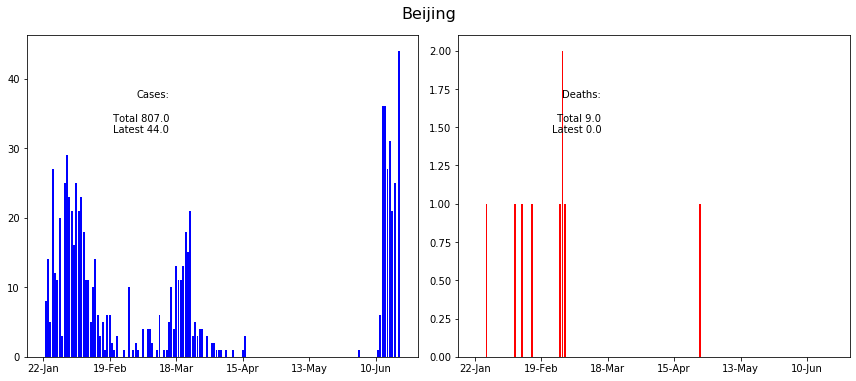

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

fig.suptitle(userRegion, x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(filtered.Confirmed.sum()) + '\nLatest ' + str(filtered["Confirmed"][-1]), horizontalalignment='right')
plt.figtext(0.7, 0.7, 'Deaths:\n\n Total ' + str(filtered.Deaths.sum()) + '\nLatest ' + str(filtered["Deaths"][-1]), horizontalalignment='right')

fig.tight_layout()

### Additional

In [ ]:
# test - stacked bar chart

# check https://altair-viz.github.io/user_guide/customization.html#adjusting-axis-labels

#%pip install altair

import altair as alt
import pandas as pd

metricsOrder=["Deaths","Recovered","Active"]

bars=alt.Chart().mark_bar().encode(
    x=alt.X('sum(Number)',stack='zero'), # this should be a new "number" column for number of Confirmed	Deaths	Recovered	Active
    y=alt.Y('Country_Region', sort=top10), # countries'
    color=alt.Color('Status',sort=["Deaths","Recovered","Active"],
                   scale = alt.Scale(domain=["Deaths","Recovered","Active"], range=['red','green', 'grey']))
).properties(
    width=400,
    height=200)

# text=alt.Chart().mark_text(dx=-15, dy=3).encode(
#     y=alt.Y('Country_Region', sort=top10),
#     x=alt.X('sum(Number)',  stack='zero'),
#     color=alt.Color('Status', legend=None, scale=alt.Scale(range=['white']),sort=["Deaths","Recovered","Active"]),
#     text=alt.Text('sum(Number)',format='.0f')
# )

# horsepower = ranked_text.encode(text='Horsepower:N').properties(title='Horsepower')
# mpg = ranked_text.encode(text='Miles_per_Gallon:N').properties(title='MPG')
# origin = ranked_text.encode(text='Origin:N').properties(title='Origin')
# text = alt.hconcat(horsepower, mpg, origin) # Combine data tables
text = top10_enigma_stats # Combine data tables

#scale = alt.Scale(domain=["Deaths","Recovered","Active"], range=['red','green', 'amber'])

alt.layer(bars, text, data=meltedEnigmaSummary).resolve_scale(color='independent')

In [ ]:
meltedEnigmaSummary.head(25)

In [ ]:
# test - stacked bar chart

import altair as alt
import pandas as pd
from vega_datasets import data

df=data.barley()

bars=alt.Chart().mark_bar().encode(
    x=alt.X('sum(yield)',stack='zero'), # this should be a new "number" column for number of Confirmed	Deaths	Recovered	Active
    y=alt.Y('variety'), ' countries'
    color=alt.Color('site') # this should be a new "status" column: Confirmed	Deaths	Recovered	Active
)

text=alt.Chart().mark_text(dx=-15, dy=3).encode(
    y=alt.Y('variety'),
    x=alt.X('sum(yield)',  stack='zero'),
    color=alt.Color('site', legend=None, scale=alt.Scale(range=['white'])),
    text=alt.Text('sum(yield)',format='.1f')
)

alt.layer(bars, text, data=df).resolve_scale(color='independent')

### Other

In [ ]:
# set MonthYear as index
#filtered_df.set_index('dateRep', inplace=True)

#plot cases and deaths

fig = plt.figure(figsize=(12,8))

fig.suptitle('Covd-19 latest cases and deaths distribution: ' , fontsize=12)

ax1 = fig.add_subplot(111)
ax1.plot(filtered_df["cases"],label="Cases")
ax2 = ax1.twinx()
ax2.plot(filtered_df["deaths"], color='r',label="Deaths")

ax1.set_ylabel('Cases', fontsize=12 )
ax2.set_ylabel('Deaths', fontsize=12)

fig.legend(loc='best')

In [ ]:
#alternative (basic)

#filter plot data only
plot_df=filtered_df[[ "cases","deaths"]]
plot_df.head()

ax = plot_df.plot(figsize=(14,6), lw=2, style='k-')

In [ ]:
#alternative (side by side)

#filter plot data only
plot_cases=filtered_df[["cases"]]
plot_deaths=filtered_df[["deaths"]]

plot_cases.plot(figsize=(6,4), color='b', lw=2)
plot_deaths.plot(figsize=(6,4), color='r', lw=2)